In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
xlsx = pd.ExcelFile('Hwage.xlsx')


In [4]:
wages = pd.read_excel(xlsx, 'Sheet1')
wages.head()

,Hwage,Educ,Exper,Female,Union
0,9.0,10,27,0,0
1,5.5,12,20,0,0
2,3.8,12,4,1,0
3,10.5,12,29,1,0
4,15.0,12,40,0,1


In [5]:
wages.shape

(527, 5)

In [6]:
wages.Educ.unique()

array([10, 12, 16, 14,  8, 17, 13, 18, 15,  9,  7, 11,  6])

In [9]:
Education_Level = []

for row in wages['Educ']:
    if row <= 9:
        Education_Level.append('MiddleSchool')
    elif row <= 12:
        Education_Level.append('HighSchool')
    else:
        Education_Level.append('College')
        
wages['Education_Level'] = Education_Level

In [10]:
wages['Education_Level'].unique()

array(['HighSchool', 'College', 'MiddleSchool'], dtype=object)

In [11]:
wages.head()

,Hwage,Educ,Exper,Female,Union,Education_Level
0,9.0,10,27,0,0,HighSchool
1,5.5,12,20,0,0,HighSchool
2,3.8,12,4,1,0,HighSchool
3,10.5,12,29,1,0,HighSchool
4,15.0,12,40,0,1,HighSchool


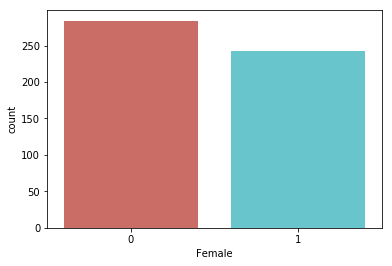

In [12]:
sns.countplot(x="Female", data=wages, palette='hls')

In [13]:
wages.describe()

,Hwage,Educ,Exper,Female,Union
count,527.000000,527.000000,527.000000,527.000000,527.000000
mean,8.980266,13.085389,17.690702,0.461101,0.182163
std,4.910993,2.491490,12.150716,0.498958,0.386346
min,1.750000,6.000000,0.000000,0.000000,0.000000
25%,5.250000,12.000000,8.000000,0.000000,0.000000
50%,7.780000,12.000000,15.000000,0.000000,0.000000
75%,11.250000,15.000000,26.000000,1.000000,0.000000
max,26.290000,18.000000,49.000000,1.000000,1.000000


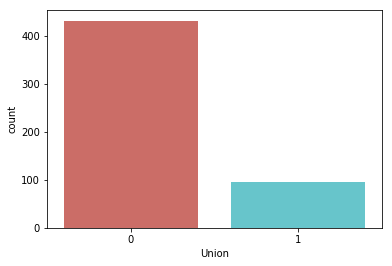

In [14]:
sns.countplot(x="Union", data=wages, palette='hls')

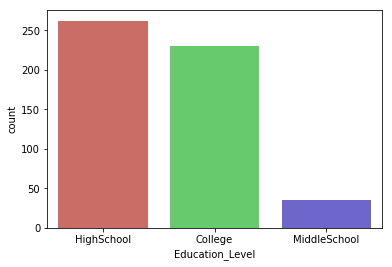

In [15]:
sns.countplot(x="Education_Level", data=wages, palette='hls')

In [16]:
wages['logHwage'] = np.log(wages['Hwage'])

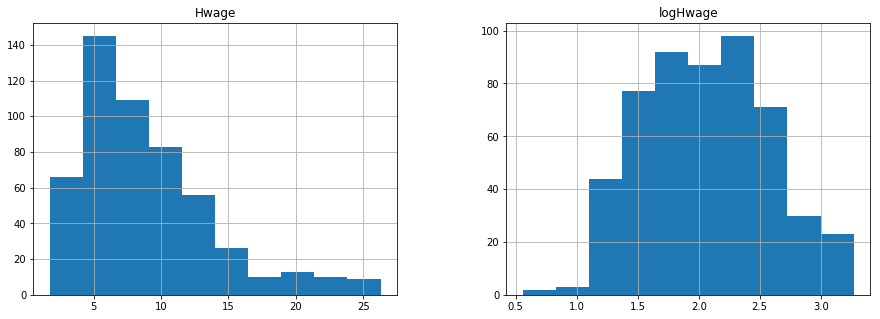

In [20]:
wages[['Hwage', 'logHwage']].hist(figsize=(15, 5));

In [21]:
wages.groupby('Education_Level').mean()

,Hwage,Educ,Exper,Female,Union,logHwage
Education_Level,,,,,,
College,10.896348,15.356522,14.100000,0.434783,0.169565,2.254871
HighSchool,7.658626,11.767176,18.729008,0.480916,0.183206,1.931871
MiddleSchool,6.282286,8.028571,33.514286,0.485714,0.257143,1.743991


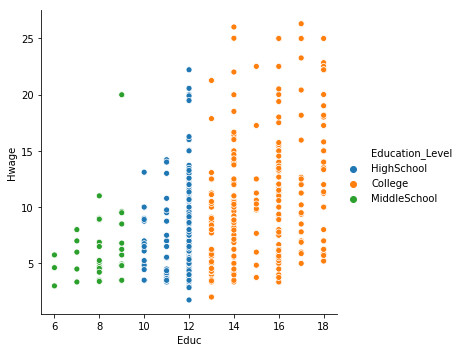

In [22]:
sns.relplot(x="Educ", y="Hwage", hue='Education_Level', data=wages);

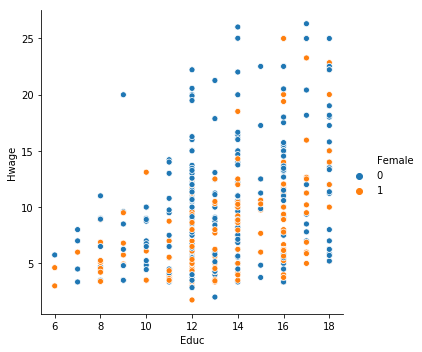

In [23]:
fig = sns.relplot(x="Educ", y="Hwage", hue='Female', data=wages);
fig.savefig('Education_vs_Wage_by_Female.png')

In [24]:
wages.corr()

,Hwage,Educ,Exper,Female,Union,logHwage
Hwage,1.000000,0.408006,0.116532,-0.237710,0.174864,0.955171
Educ,0.408006,1.000000,-0.321348,-0.028674,-0.037916,0.396529
Exper,0.116532,-0.321348,1.000000,0.098514,0.126230,0.126902
Female,-0.237710,-0.028674,0.098514,1.000000,-0.160415,-0.243034
Union,0.174864,-0.037916,0.126230,-0.160415,1.000000,0.213312
logHwage,0.955171,0.396529,0.126902,-0.243034,0.213312,1.000000


In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
results_5 = smf.ols('logHwage ~ Educ + Exper + Female + Union', data=wages).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:               logHwage   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     61.41
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.63e-42
Time:                        21:25:23   Log-Likelihood:                -297.19
No. Observations:                 527   AIC:                             604.4
Df Residuals:                     522   BIC:                             625.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5941      0.118      5.019      0.0

In [27]:
wages_male = wages[wages['Female']==0]
wages_male.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
0,9.0,10,27,0,0,HighSchool,2.197225
1,5.5,12,20,0,0,HighSchool,1.704748
4,15.0,12,40,0,1,HighSchool,2.708050
7,15.0,14,22,0,0,College,2.708050
8,11.0,8,42,0,0,MiddleSchool,2.397895


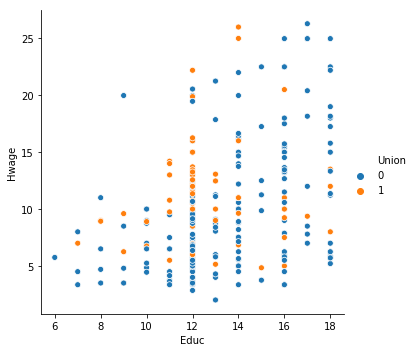

In [29]:
sns.relplot(x="Educ", y="Hwage", hue='Union', data=wages_male);

In [30]:
wages_male[wages['Union']==1].mean()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Hwage       11.288971
Educ        12.661765
Exper       20.573529
Female       0.000000
Union        1.000000
logHwage     2.346657
dtype: float64

In [31]:
wages_male[wages['Union']==0].mean()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Hwage        9.671898
Educ        13.305556
Exper       15.328704
Female       0.000000
Union        0.000000
logHwage     2.122669
dtype: float64

In [32]:
wages_female = wages[wages['Female']==1]
wages_female.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
2,3.80,12,4,1,0,HighSchool,1.335001
3,10.50,12,29,1,0,HighSchool,2.351375
5,9.00,16,27,1,0,College,2.197225
6,9.57,12,5,1,1,HighSchool,2.258633
9,5.00,12,14,1,0,HighSchool,1.609438


In [33]:
wages_female[wages_female['Union']==1].mean()

Hwage        9.606071
Educ        13.428571
Exper       21.821429
Female       1.000000
Union        1.000000
logHwage     2.164258
dtype: float64

In [34]:
wages_female[wages_female['Union']==0].mean()

Hwage        7.473721
Educ        12.953488
Exper       18.613953
Female       1.000000
Union        0.000000
logHwage     1.893683
dtype: float64

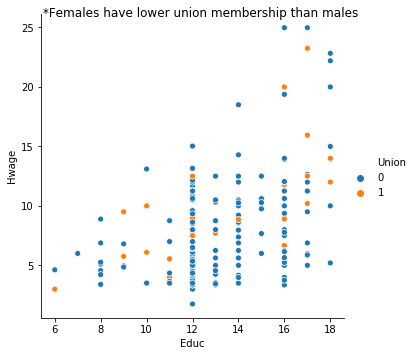

In [35]:
ax = sns.relplot(x="Educ", y="Hwage", hue='Union', data=wages_female);
ax.fig.suptitle('*Females have lower union membership than males');

In [38]:
pivot = pd.pivot_table(wages, index=['Female', 'Union', 'Education_Level'], aggfunc='mean')
pivot.drop(['Educ', 'Exper', 'logHwage'], axis=1, inplace=True)
pivot

Hwage
Female Union Education_Level           
0      0     College          11.850190
             HighSchool        7.684646
             MiddleSchool      7.006667
       1     College          11.646000
             HighSchool       11.681622
             MiddleSchool      7.380000
1      0     College           9.359767
             HighSchool        6.336000
             MiddleSchool      5.233571
       1     College          11.842857
             HighSchool        7.720000
             MiddleSchool      6.083333